### Install libraries

In [1]:
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install matplotlib
# !pip3 install seaborn
# !pip3 install category_encoders
# !pip3 install sklearn
# !pip3 install scipy
# !pip3 install xlrd

### Import libraries

In [2]:
# Using python 3.6
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from scipy import stats
from warnings import filterwarnings

filterwarnings('ignore')
pd.set_option("display.max_rows", None, "display.max_columns", None)

### Read election data

In [3]:
e2016m = pd.read_csv('./2016/2016_parliamentary_round_1_majoritarian.csv')
e2016p = pd.read_csv('./2016/2016_parliamentary_round_1_proportional.csv')

e2018p = pd.read_csv('./2018/2018_presidential_round_1_proportional.csv')

e2020m = pd.read_csv('./2020/2020_parliamentary_round_1_majoritarian.csv')
e2020p = pd.read_csv('./2020/2020_parliamentary_round_1_proportional.csv')

e2021_original = pd.read_excel('./2021.xls')
e2021 = e2021_original.copy()
e2021.head()

,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
0,1,1 მთაწმინდა,1.01,0,proportional,0,0,1338,20,668,12,646,2,0,176.0,23.0,67.0,23.0,232.0,31.0,21.0,1350,49.481481,0.446576
1,1,1 მთაწმინდა,1.01,0,majoritarian,0,0,1338,31,668,12,629,8,0,NaN,77.0,88.0,NaN,237.0,98.0,37.0,1350,49.481481,0.446576
2,1,1 მთაწმინდა,1.01,0,mayor,0,0,1338,17,668,12,651,0,1,230.0,12.0,77.0,NaN,269.0,NaN,31.0,1350,49.481481,0.446576
3,1,1 მთაწმინდა,1.02,0,proportional,0,0,1270,15,639,13,622,2,0,150.0,26.0,59.0,24.0,253.0,34.0,18.0,1283,49.805144,0.424413
4,1,1 მთაწმინდა,1.02,0,majoritarian,0,0,1270,24,639,13,609,6,0,NaN,83.0,54.0,NaN,282.0,100.0,31.0,1283,49.805144,0.424413


### Drop unnecessary column 'total_registered_plus_special_weighted'

In [4]:
e2021 = e2021.drop(columns='total_registered_plus_special_weighted')

### Check pre-2021 column names

In [5]:
e2020p.columns[-5:], e2016p.columns[-5:]

(Index(['Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|"Georgian Dream – Democratic Georgia"',
        'Party || 5 || საარჩევნო ბლოკი „ერთიანი ნაციონალური მოძრაობა-გაერთიანებული ოპოზიცია „ძალა ერთობაშია” |Election Bloc - United National Movement - United Opposition "Strength is in Unity"',
        'Party || 56 || „ლელო - მამუკა ხაზარაძე“|"Lelo - Mamuka Khazaradze"',
        'Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი”|"Davit Tarkhan-Mouravi, Irma Inashvili - "Alliance of Patriots of Georgia"',
        'Party || 999 || Other'],
       dtype='object'),
 Index(['Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”',
        'Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”',
        'Party || 5 || „ერთიანი ნაციონალური მოძრაობა”',
        'Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”',
        'Party || 999 || Other'],
       dtype='object'))

### Shorten pre-2021 data party names to just party number for that year

In [6]:
def party_name_parser(col: str):
    return col[9:12].rstrip(" |") if col[:5] == 'Party' else col
e2016p.rename(columns=party_name_parser, inplace=True)
e2016m.rename(columns=party_name_parser, inplace=True)
e2018p.rename(columns=party_name_parser, inplace=True)
e2020p.rename(columns=party_name_parser, inplace=True)
e2020m.rename(columns=party_name_parser, inplace=True)
e2020p.columns

Index(['lat', 'lng', 'year', 'map_name', 'address_1', 'address_2', 'address_3',
       'address_4', 'protocols', 'district_id', 'division_id', 'internal_id',
       'archive_name', 'district_name', 'election_type', 'internal_name',
       'abroad_district_id', 'total_registered_voters',
       'total_registered_voters_men', 'total_registered_voters_women',
       'participated', 'participated_confidence', 'invalid_ballots',
       'invalid_ballots_confidence', '2', '27', '36', '41', '5', '56', '8',
       '999'],
      dtype='object')

### Check data for missing values

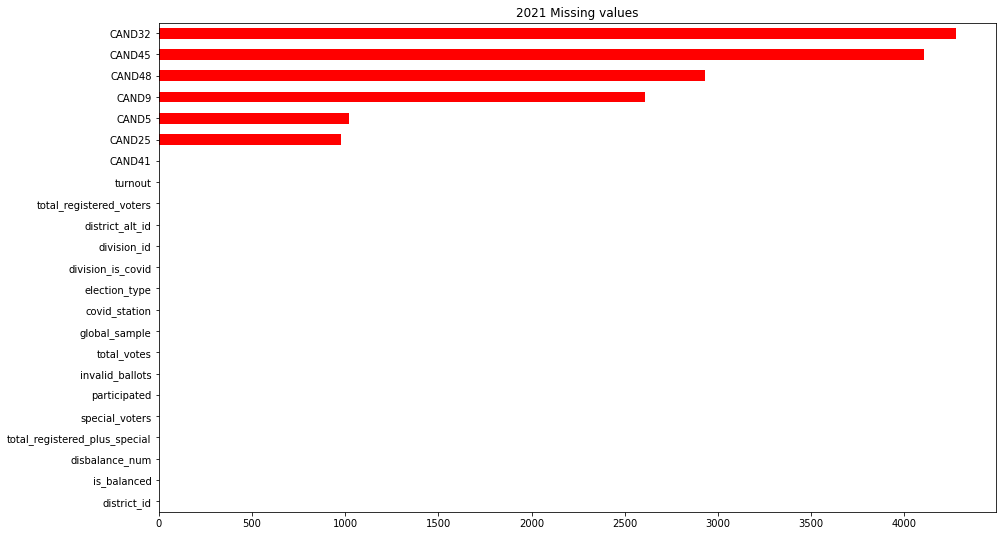

In [7]:
plt.figure(figsize=(15, 9))
e2021.isna().sum().sort_values().plot.barh(color='red')
plt.title('2021 Missing values')
plt.show()

### Missing values in candidate vote number columns, inspect these rows

In [8]:
cand_cols = ['CAND5', 'CAND9', 'CAND25', 'CAND32', 'CAND41', 'CAND45', 'CAND48']
e2021[e2021.isnull().any(axis=1)].head(10)

,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout
1,1,1 მთაწმინდა,1.01,0,majoritarian,0,0,1338,31,668,12,629,8,0,NaN,77.0,88.0,NaN,237.0,98.0,37.0,1350,49.481481
2,1,1 მთაწმინდა,1.01,0,mayor,0,0,1338,17,668,12,651,0,1,230.0,12.0,77.0,NaN,269.0,NaN,31.0,1350,49.481481
4,1,1 მთაწმინდა,1.02,0,majoritarian,0,0,1270,24,639,13,609,6,0,NaN,83.0,54.0,NaN,282.0,100.0,31.0,1283,49.805144
5,1,1 მთაწმინდა,1.02,0,mayor,0,0,1270,9,639,13,630,0,1,200.0,17.0,59.0,NaN,286.0,NaN,42.0,1283,49.805144
7,1,1 მთაწმინდა,1.03,0,majoritarian,0,2,1479,36,785,16,739,10,0,NaN,161.0,65.0,NaN,280.0,101.0,36.0,1495,52.508361
8,1,1 მთაწმინდა,1.03,0,mayor,0,2,1479,14,785,16,769,2,0,316.0,15.0,59.0,NaN,308.0,NaN,38.0,1495,52.508361
10,1,1 მთაწმინდა,1.04,0,majoritarian,0,1,1185,24,603,13,572,7,0,NaN,69.0,76.0,NaN,233.0,72.0,35.0,1198,50.333890
11,1,1 მთაწმინდა,1.04,0,mayor,0,1,1185,18,603,13,586,-1,0,178.0,12.0,72.0,NaN,258.0,NaN,34.0,1198,50.333890
13,1,1 მთაწმინდა,1.05,0,majoritarian,0,3,1612,28,735,10,702,5,0,NaN,119.0,89.0,NaN,285.0,88.0,34.0,1622,45.314427
14,1,1 მთაწმინდა,1.05,0,mayor,0,3,1612,17,735,10,716,2,0,228.0,31.0,89.0,NaN,305.0,NaN,36.0,1622,45.314427


### Nothing special, probably means there was no candidate at all, so it's safe to fill them with zeroes

### I changed my mind later and decided not to fill with zeroes as it might change distribution

In [9]:
# e2021: pd.DataFrame = e2021.fillna(0)
print('Remaining null values:', e2021.isna().sum().sum())

Remaining null values: 15919


### Next check for some obvious irregularities, such as when total votes are more than people participated or disbalance is too high, or turnout is outside 0-100 range and etc

#### Total votes > Num participated

In [10]:
irregular_rows = set()
for n in e2021[e2021.total_votes > e2021.participated].index.values.tolist():
    irregular_rows.add(n)
print('Irregular cases total:', len(irregular_rows))
e2021[e2021.total_votes > e2021.participated].head()

Irregular cases total: 19


,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout
605,3,3 საბურთალო,3.840,0,majoritarian,0,1,1532,38,802,10,864,-100,0,NaN,81.0,83.0,NaN,308.0,122.0,42.0,1542,52.010376
606,3,3 საბურთალო,3.840,0,mayor,0,1,1532,18,0,10,784,-802,0,224.0,31.0,93.0,NaN,353.0,NaN,50.0,1542,0.000000
768,5,5 ისანი,5.100,0,mayor,0,0,1387,9,630,8,631,-10,0,256.0,12.0,46.0,NaN,260.0,NaN,28.0,1395,45.161290
814,5,5 ისანი,5.260,0,proportional,0,1,1262,19,550,12,601,-70,0,188.0,8.0,44.0,4.0,186.0,15.0,12.0,1274,43.171115
1335,6,6 სამგორი,6.117,0,mayor,0,1,675,13,415,9,423,-21,0,84.0,8.0,22.0,NaN,237.0,NaN,10.0,684,60.672515


#### Turnout

##### Turnout density function

<AxesSubplot:xlabel='turnout', ylabel='Density'>

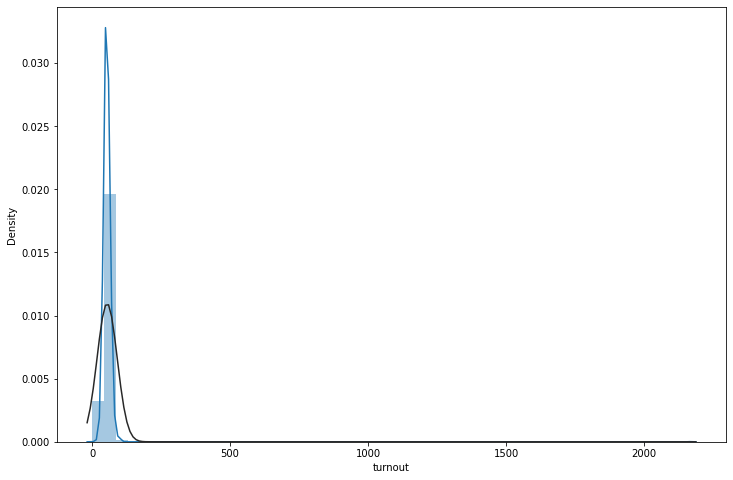

In [11]:
plt.figure(1, figsize=(12, 8))
sb.distplot(e2021.turnout, fit=stats.norm)

### Distribution is very skewed from normal and X axis exceeds 0-100 interval, this means there must be irregularities in turnout column

In [12]:
for n in e2021[(e2021.turnout <= 0) | (e2021.turnout > 100)].index.values.tolist():
    irregular_rows.add(n)
print('Irregular cases total:', len(irregular_rows))
e2021[(e2021.turnout <= 0) | (e2021.turnout > 100)].head()

Irregular cases total: 22


,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout
606,3,3 საბურთალო,3.840,0,mayor,0,1,1532,18,0,10,784,-802,0,224.0,31.0,93.0,NaN,353.0,NaN,50.0,1542,0.0
8154,10,10 გლდანი,10.113,0,proportional,0,0,0,17,217,10,200,0,1,26.0,3.0,12.0,2.0,133.0,5.0,0.0,10,2170.0
8155,10,10 გლდანი,10.113,0,majoritarian,0,0,0,1,43,4,42,0,1,NaN,1.0,0.0,8.0,29.0,NaN,0.0,4,1075.0
8156,10,10 გლდანი,10.113,0,mayor,0,0,0,9,217,10,208,0,1,38.0,1.0,12.0,NaN,141.0,NaN,4.0,10,2170.0


<AxesSubplot:xlabel='turnout', ylabel='Density'>

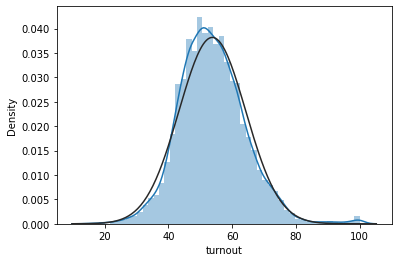

In [13]:
reg = e2021[(e2021.turnout > 0) & (e2021.turnout <= 100)]
sb.distplot(reg.turnout, fit=stats.norm)

#### With these cases removed the curve is closer to normal distribution

### Disbalance distribution and boxenplot

<AxesSubplot:xlabel='disbalance_num'>

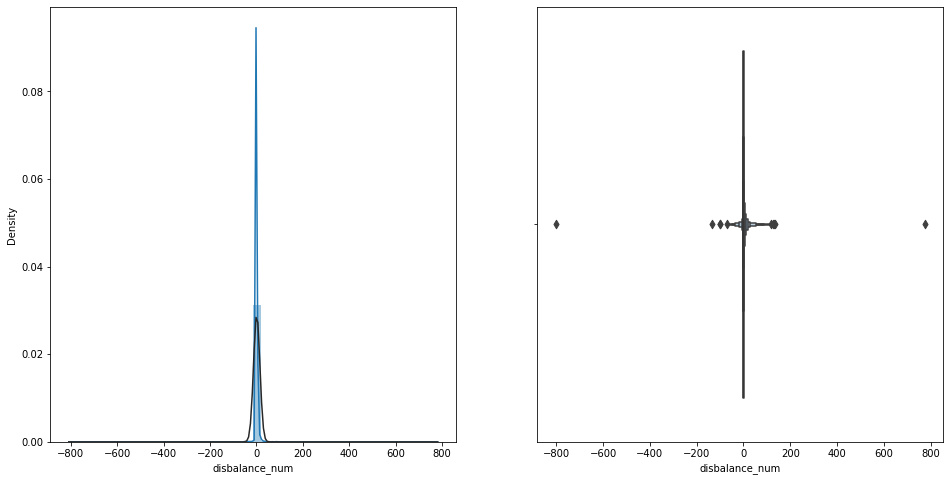

In [14]:
plt.figure(1, figsize=(16, 8))
plt.subplot(121)
sb.distplot(e2021.disbalance_num, fit=stats.norm)

plt.subplot(122)
sb.boxenplot(e2021.disbalance_num)

#### There are outliers as visible on boxplot, while most of the values are concentrated near 0

#### Get cases where absolute value of disbalance exceeds threshold

In [15]:
disbalance_threshold = 50
for n in e2021[abs(e2021.disbalance_num) >= disbalance_threshold].index.values.tolist():
    irregular_rows.add(n)
print('Irregular cases total:', len(irregular_rows))
e2021[abs(e2021.disbalance_num) >= disbalance_threshold].head()

Irregular cases total: 45


,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout
243,2,2 ვაკე,2.42,0,majoritarian,0,2,1401,36,810,9,0,774,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1410,57.446809
346,2,2 ვაკე,2.77,0,proportional,0,0,1602,75,840,13,816,-51,0,231.0,51.0,86.0,37.0,203.0,73.0,29.0,1615,52.012384
404,3,3 საბურთალო,3.17,0,majoritarian,0,2,1426,29,816,14,671,116,0,NaN,9.0,82.0,NaN,264.0,138.0,51.0,1440,56.666667
426,3,3 საბურთალო,3.24,0,mayor,0,2,1372,21,765,8,674,70,0,251.0,31.0,3.0,NaN,326.0,NaN,36.0,1380,55.434783
605,3,3 საბურთალო,3.84,0,majoritarian,0,1,1532,38,802,10,864,-100,0,NaN,81.0,83.0,NaN,308.0,122.0,42.0,1542,52.010376


### Next, plot 2 dimensional distribution to find irregularities that would probably not be visible on 1D graph.

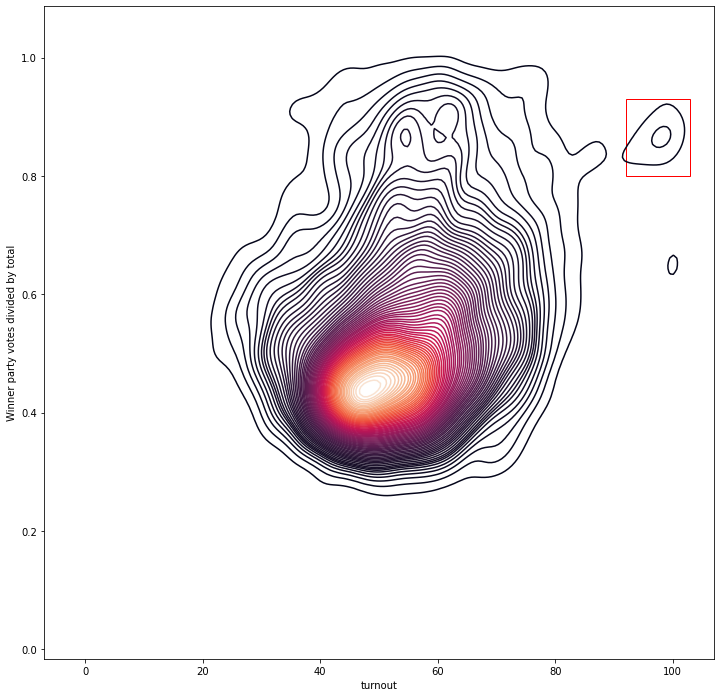

In [16]:
e2021['division_winner_votes'] = e2021[['CAND5', 'CAND9', 'CAND25', 'CAND32', 'CAND41', 'CAND45', 'CAND48']].max(axis=1)
e2021_real_turnout = e2021[e2021.turnout <= 100]
X = e2021_real_turnout['turnout']
Y = e2021_real_turnout['division_winner_votes'] / e2021_real_turnout['total_votes']

plt.figure(1, figsize=(12, 12))
sb.kdeplot(X, Y, fill=False, cmap='rocket', thresh=0, levels=70)
plt.axes().add_artist(plt.Rectangle((92, 0.8), 11, 0.13, fill=False, color='r'))
plt.ylabel('Winner party votes divided by total')
plt.show()

### This is so-called election fingerprint. Cases near the top right corner, that is, whenever turnout is closer to 100% and winning party (for given division) fraction of votes is almost 1, is an irregularity and can be observed in other countries too,  e.g. Russia. Plot shown also indicates that this separated blob would be far away from the center of corresponding bivariate gaussian distribution and in most cases suggests some kind of rigging.
https://www.pnas.org/content/pnas/109/41/16469/F1.large.jpg

#### Add these cases to the set of irregularities

In [17]:
turnout_threshold = 90
total_vote_threshold = 0.9
for n in e2021[(e2021.turnout >= turnout_threshold) & (e2021.division_winner_votes / e2021.total_votes >= total_vote_threshold)].index.values.tolist():
    irregular_rows.add(n)
print('Irregular cases total:', len(irregular_rows))
e2021[(e2021.turnout >= turnout_threshold) & (e2021.division_winner_votes / e2021.total_votes >= total_vote_threshold)]

Irregular cases total: 54


,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,division_winner_votes
3575,24,24 დმანისი,24.27,0,mayor,0,0,23,0,30,9,30,0,1,1.0,NaN,NaN,NaN,29.0,NaN,NaN,32,93.750000,29.0
8104,20,20 რუსთავი,20.86,0,mayor,0,0,0,0,94,101,75,19,0,1.0,NaN,0.0,NaN,74.0,NaN,NaN,101,93.069307,74.0
8152,27,27 მცხეთა,27.46,0,proportional,0,0,0,1,97,107,96,0,1,2.0,0.0,0.0,0.0,92.0,0.0,0.0,107,90.654206,92.0
8153,27,27 მცხეთა,27.46,0,mayor,0,0,0,1,97,107,94,2,0,2.0,NaN,1.0,NaN,91.0,NaN,NaN,107,90.654206,91.0
8167,40,40 ახალქალაქი,40.71,1,proportional,1,0,0,0,30,30,30,0,1,1.0,0.0,0.0,0.0,28.0,0.0,0.0,30,100.000000,28.0
8168,40,40 ახალქალაქი,40.71,1,mayor,1,0,0,0,30,30,30,0,1,1.0,NaN,NaN,NaN,27.0,NaN,NaN,30,100.000000,27.0
8178,26,26 თეთრიწყარო,26.43,1,mayor,1,0,0,0,20,21,20,0,1,2.0,NaN,NaN,NaN,18.0,NaN,NaN,21,95.238095,18.0
8227,58,58 წყალტუბო,58.68,0,proportional,1,0,0,2,67,68,65,0,1,0.0,0.0,0.0,0.0,61.0,1.0,0.0,68,98.529412,61.0
8228,58,58 წყალტუბო,58.68,0,mayor,1,0,0,2,67,68,65,0,1,1.0,NaN,1.0,NaN,62.0,NaN,NaN,68,98.529412,62.0


### Next, plot cumulative sum of party votes in relation to turnout (ascending). The result curve in an usual case is sigmoid, reaching a plateau on each end. Increasing function in turnout values closer to maximum indicates to abnormality

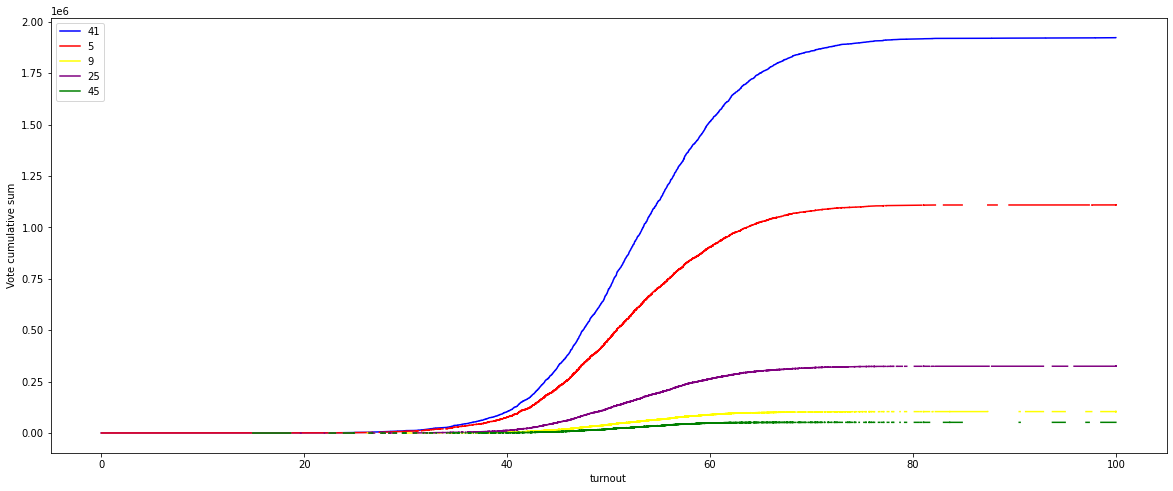

In [18]:
plt.figure(1, figsize=(20, 8))
csum_df = e2021_real_turnout.sort_values('turnout')
plt.plot(csum_df.turnout, csum_df.CAND41.cumsum(), color='blue', label='41')
plt.plot(csum_df.turnout, csum_df.CAND5.cumsum(), color='red', label='5')
plt.plot(csum_df.turnout, csum_df.CAND9.cumsum(), color='yellow', label='9')
plt.plot(csum_df.turnout, csum_df.CAND25.cumsum(), color='purple', label='25')
plt.plot(csum_df.turnout, csum_df.CAND45.cumsum(), color='green', label='45')
plt.xlabel('turnout')
plt.ylabel('Vote cumulative sum')
plt.legend()
plt.show()

#### This plot doesn't reveal any significant oddities for parties since given curves resemble sigmoids with plateaued ends. Discontinuity is caused by null values that I decided not to fill. An example of irregularity would look something like Russian and Ugandan election plots on following link
https://www.pnas.org/content/pnas/109/41/16469/F6.large.jpg?width=800&height=600&carousel=1

### Add division winner vote count fraction multiplied by turnout as parameter to improve model

In [19]:
e2021['winner_coef'] = (e2021.division_winner_votes / e2021.total_votes * e2021.turnout)

winner_coef_threshold = 85
for n in e2021[e2021['winner_coef'] > winner_coef_threshold].index.values.tolist():
    irregular_rows.add(n)
print('Irregular cases total:', len(irregular_rows))
e2021.iloc[e2021[e2021['winner_coef'] > winner_coef_threshold].index.values.tolist(), :].head()

Irregular cases total: 58


,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,division_winner_votes,winner_coef
3575,24,24 დმანისი,24.27,0,mayor,0,0,23,0,30,9,30,0,1,1.0,NaN,NaN,NaN,29.0,NaN,NaN,32,93.750000,29.0,90.625000
8104,20,20 რუსთავი,20.86,0,mayor,0,0,0,0,94,101,75,19,0,1.0,NaN,0.0,NaN,74.0,NaN,NaN,101,93.069307,74.0,91.828383
8144,22,22 მარნეული,22.91,1,proportional,1,0,0,2,49,49,32,15,0,4.0,0.0,0.0,0.0,28.0,0.0,0.0,49,100.000000,28.0,87.500000
8145,22,22 მარნეული,22.91,1,mayor,1,0,0,2,49,49,32,15,0,4.0,NaN,NaN,NaN,28.0,NaN,NaN,49,100.000000,28.0,87.500000
8152,27,27 მცხეთა,27.46,0,proportional,0,0,0,1,97,107,96,0,1,2.0,0.0,0.0,0.0,92.0,0.0,0.0,107,90.654206,92.0,86.876947


### Plot correlation between columns

<AxesSubplot:>

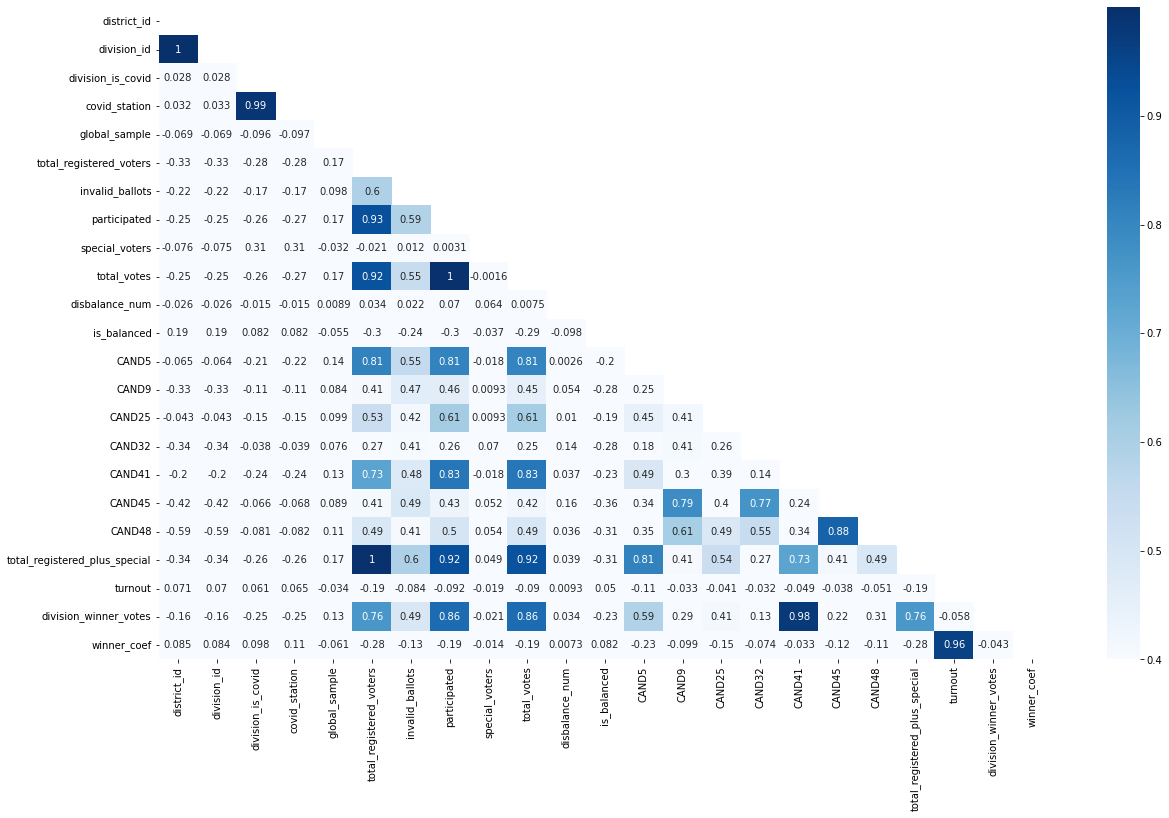

In [20]:
plt.figure(1, figsize=(20, 12))
mask = np.triu(np.ones_like(e2021.corr()))
sb.heatmap(e2021.corr(), cmap='Blues', annot=True, mask=mask, vmin=0.4)

### We see a few significant correlations between columns that may be explained in one way or another.
#### division_id - district_id: division_id contains district_id value, nothing special
#### covid_station - division_is_covid: in the data all covid divisions have a covid station, but there are some divisions where covid station is present but division_is_covid value is 0
#### all of the pairs where there's [participated, total_registered_plus_special, total_registered_voters, total_votes] is just proportionality
#### CAND41 - [total_votes, participated, total_registered_voters, division_winner_votes]: since CAND41 got majority of votes in most of divisions it is related to number of voters
#### CAND45 - CAND48 - CAND9: seems to be correlation between these parties, maybe from divisions where voters prefer smaller parties over major ones
#### winner_coef - turnout: winner_coef column is proportional to turnout and division winner candidate vote count fraction

## Split election data into train, validation and test datasets, with supposed irregular cases in only validation and test datasets for anomaly detection algorithm

In [21]:
train_df, validation_df = train_test_split(e2021, test_size=0.2, random_state=25)
train_df, test_df = train_test_split(train_df, test_size=0.25, random_state=25)
train_df.head()

,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,division_winner_votes,winner_coef
1536,8,8 დიდუბე,8.22,0,mayor,0,3,1059,10,569,10,559,0,1,173.0,12.0,53.0,NaN,266.0,NaN,22.0,1069,53.227315,266.0,25.328204
736,4,4 კრწანისი,4.32,0,proportional,0,0,1068,25,593,11,568,0,1,192.0,15.0,53.0,9.0,222.0,18.0,9.0,1079,54.958295,222.0,21.480179
3418,23,23 ბოლნისი,23.10,0,mayor,0,0,867,20,321,8,300,1,0,163.0,NaN,NaN,NaN,137.0,NaN,NaN,875,36.685714,163.0,19.932571
3993,29,29 ყაზბეგი,29.05,0,mayor,0,0,607,4,412,6,408,0,1,10.0,8.0,12.0,NaN,317.0,NaN,NaN,613,67.210440,317.0,52.219877
4279,32,32 გორი,32.10,0,mayor,0,1,1261,37,753,10,716,0,1,241.0,NaN,60.0,NaN,401.0,NaN,NaN,1271,59.244689,401.0,33.180336


### Check for shapes before removing irregular rows from each dataset and redistributing between validation and test

In [22]:
train_df.shape, validation_df.shape, test_df.shape

((4938, 25), (1647, 25), (1646, 25))

### Remove said rows from each dataframe

In [23]:
train_df: pd.DataFrame = train_df.sort_index()
validation_df: pd.DataFrame = validation_df.sort_index()
test_df: pd.DataFrame = test_df.sort_index()
irregular_rows_list = list(irregular_rows)
train_df = train_df.loc[train_df.apply(lambda x: x.name not in irregular_rows_list, axis=1), :]
validation_df = validation_df.loc[validation_df.apply(lambda x: x.name not in irregular_rows_list, axis=1), :]
test_df = test_df.loc[test_df.apply(lambda x: x.name not in irregular_rows_list, axis=1), :]
train_df.shape, validation_df.shape, test_df.shape

((4902, 25), (1637, 25), (1634, 25))

### Add random half of these rows to validation and another half to test

In [24]:
import random

random.shuffle(irregular_rows_list)
rows_1 = irregular_rows_list[:int(len(irregular_rows_list) / 2)]
rows_2 = irregular_rows_list[int(len(irregular_rows_list) / 2):]

validation_df: pd.DataFrame = validation_df.append(e2021.loc[rows_1, :])
validation_df: pd.DataFrame = validation_df.sort_index()

test_df: pd.DataFrame = test_df.append(e2021.loc[rows_2, :])
test_df: pd.DataFrame = test_df.sort_index()

train_df.shape, validation_df.shape, test_df.shape

((4902, 25), (1666, 25), (1663, 25))

### Create list of chosen features' mean and sigma values from train dataset for anomaly detection. Define density estimation function to find anomalous cases

In [25]:
mu_values_1 = [train_df.disbalance_num.mean(), train_df.winner_coef.mean()]
sigma_values_1 = [train_df.disbalance_num.std(), train_df.winner_coef.std()]

def density_estimation_anomalous_1(row, mu_values, sigma_values, epsilon) -> bool:
    product = 1.0
    for j in range(len(mu_values_1)):
        product *= 1 / np.sqrt(2 * np.pi) / sigma_values[j] * \
            np.exp(-np.square(row[j] - mu_values[j]) / (2 * np.square(sigma_values[j])))
    return product < epsilon

### Define F1 score function to evaluate model. Define geometric progression function to quickly iterate (in relation to python's range function) over small values of epsilon with chosen step (because gaps between probabilities are large enough to traverse with geometric progression)

In [26]:
def F1_score(precision, recall):
    return 2 * precision * recall / (precision + recall)

def geometric_prog(min, max, step):
    i = min
    while i < max:
        yield i
        i *= step

### Iterate over values of epsilon, calculate F1 score for each epsilon to choose one with the highest rate

F1 maximizer epsilon: 1.0000000000000003e-09
Maximum F1 score: 0.7796610169491527


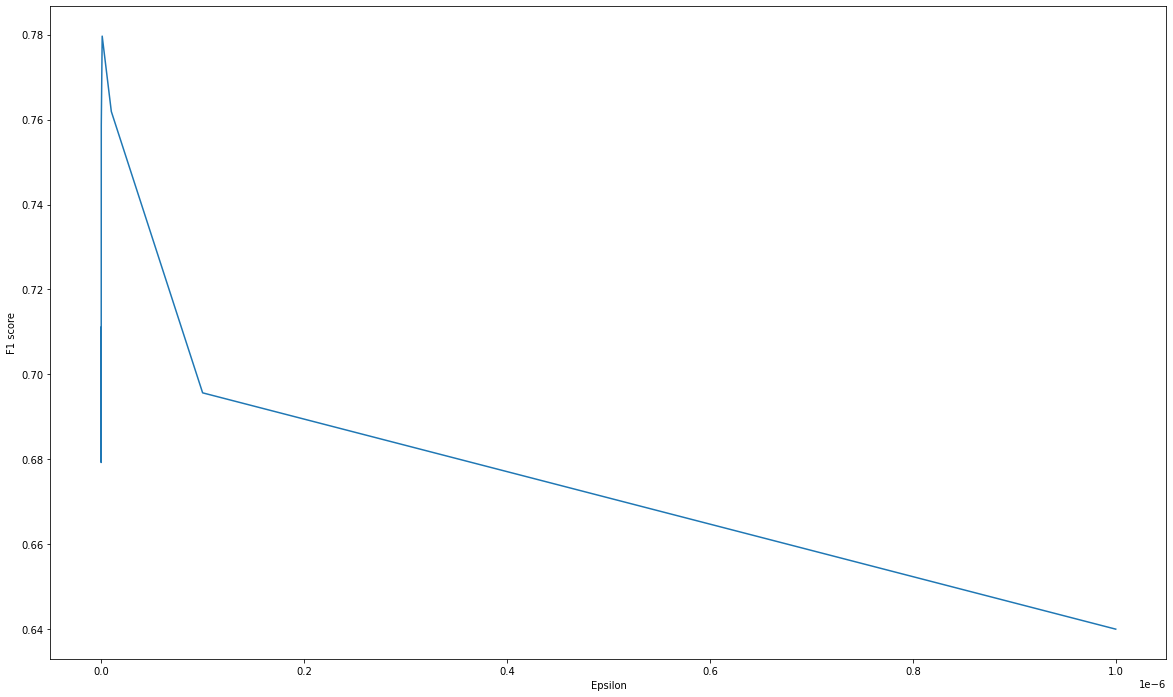

In [27]:
F1_scores = []
max_F1_epsilon = 1e-30
max_F1 = 0

for epsilon in geometric_prog(1e-30, 1e-5, 10):
    pred_1 = validation_df.loc[:, ['disbalance_num', 'winner_coef']]\
        .apply(lambda row: density_estimation_anomalous_1(row, mu_values_1, sigma_values_1, epsilon), axis=1)
    true_pos = 0
    false_pos = 0
    for i in pred_1[pred_1 == True].index.values.tolist():
        if i in rows_1: true_pos += 1
        else: false_pos += 1
    current_F1 = F1_score(true_pos / (true_pos + false_pos), true_pos / len(rows_1))
    F1_scores.append(current_F1)
    if current_F1 > max_F1:
        max_F1_epsilon = epsilon
        max_F1 = current_F1

print('F1 maximizer epsilon:', max_F1_epsilon)
print('Maximum F1 score:', max_F1)
plt.figure(1, figsize=(20, 12))
plt.plot(list(geometric_prog(1e-30, 1e-5, 10)), F1_scores)
plt.xlabel('Epsilon')
plt.ylabel('F1 score')
plt.show()

### The plot shows F1 score (validation) in relation to epsilon

## Find irregular cases for test dataset and calculate F1 score

In [28]:
epsilon = max_F1_epsilon
pred = test_df.loc[:, ['disbalance_num', 'winner_coef']]\
        .apply(lambda row: density_estimation_anomalous_1(row, mu_values_1, sigma_values_1, epsilon), axis=1)
true_pos = 0
false_pos = 0
for i in pred[pred== True].index.values.tolist():
    if i in rows_2: true_pos += 1
    else: false_pos += 1
current_F1 = F1_score(true_pos / (true_pos + false_pos), true_pos / len(rows_2))
current_F1

0.6857142857142856